In [138]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier




In [139]:
df = pd.read_csv('loan_expanded.csv')

Explore the dataset

In [140]:
df.head

<bound method NDFrame.head of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved  


In [141]:
df.info

<bound method DataFrame.info of            age  gender  occupation education_level marital_status  \
0    32.100456    Male    Engineer      Bachelor's        Married   
1    44.633959  Female     Teacher        Master's         Single   
2    27.848106    Male     Student     High School         Single   
3    50.879445  Female     Manager      Bachelor's        Married   
4    35.689175    Male  Accountant      Bachelor's        Married   
..         ...     ...         ...             ...            ...   
495  29.889972  Female      Artist      Bachelor's         Single   
496  37.216811    Male          IT        Master's        Married   
497  48.245804  Female      Doctor        Doctoral        Married   
498  55.135177    Male  Consultant        Master's        Married   
499  31.044358  Female     Analyst      Bachelor's         Single   

            income  credit_score loan_status  
0     83498.310834    716.590014    Approved  
1     63127.464989    686.448728    Approved 

In [142]:
print("Data Shape:: ", df.shape)

Data Shape::  (500, 8)


In [143]:
print("DataSet Length:: ", len(df))

DataSet Length::  500


Independent(X) and Dependent Variable(Y)

In [144]:
X = df.drop('loan_status', axis=1)
Y = df['loan_status']

In [145]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in X.columns:
    X[column] = le.fit_transform(X[column])

Y = le.fit_transform(Y)


In [146]:
X = pd.get_dummies(df.drop('loan_status', axis=1), drop_first=True)


Train test split


In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42 )

In [148]:
X_train.shape
X_test.shape

(100, 46)

Scaling


In [149]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)

Building the model

In [150]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42, 
    class_weight='balanced',
    max_depth=None,              # Changed from 3 to 5 for more detail
    min_samples_split=2,     # Added - fewer samples needed to split
    min_samples_leaf=1        # Added - fewer samples needed in leaves
)
model.fit(X_train, Y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


Prediction

In [151]:
Y_pred = model.predict(X_test)

c:\Users\Joseph\Desktop\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names


Vizualization of the Decision Tree

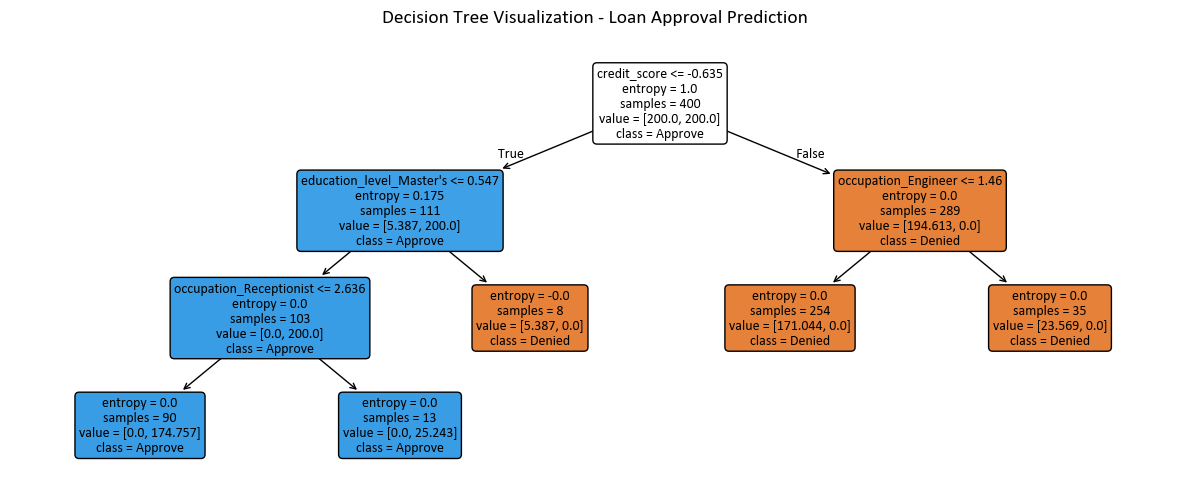

In [152]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure("Decision Tree - Loan Status", figsize=(12, 5))
plt.rcParams["font.family"] = "Calibri"
plot_tree(
    model,                                # your trained DecisionTreeClassifier
    feature_names=list(X.columns),        # column names from your dataset
    class_names=['Denied', 'Approve'],            # adjust to your encoded target labels
    filled=True,                          # color the nodes
    fontsize=10,                          # readable text
    rounded=True                          # smooth edges
)
plt.title("Decision Tree Visualization - Loan Approval Prediction", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

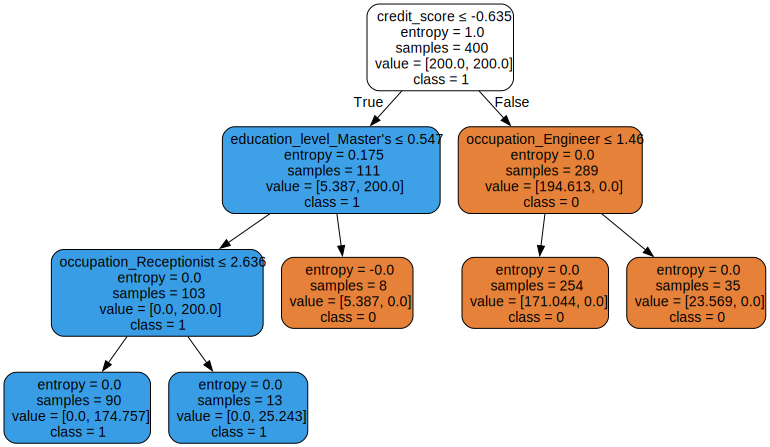

In [153]:
from sklearn import tree
import graphviz
import pandas as pd


Y = pd.Series(Y)

dot_data = tree.export_graphviz(
    model,
    out_file=None,
    feature_names=list(X.columns),
    class_names=[str(y) for y in sorted(Y.unique())],
    filled=True,              
    rounded=True,            
    special_characters=True,  
     proportion=False,        
    precision=3,             
    impurity=True,           
    label='all'              
)

graph = graphviz.Source(dot_data)
graph